# Data Boot-Camp Final Project 
## Science behind Speed Dating
### Vigya Shrote (vs1727), Meghana Dhage (md3822), Tanvi Katyal (tk1981) | Dec 21th, 2017

<img src="https://smhttp-ssl-33667.nexcesscdn.net/manual/wp-content/uploads/2015/05/movie-43-kristen-bell-justin-long-min.jpg" alt="Drawing" style="width: 1000px;"/>

# Introduction

In today’s busy world, finding and dating a romantic partner seems more time consuming than ever. As a result, many people have turned to speed dating as a solution that allows one to meet and interact with a large number of potential partners in a short amount of time. In this report, we want to explore what people are looking for in their speed dating matches, what it takes to become successful in getting approvals from a potential partner.

This analysis is exploring the topic of speed dating and we aim to provide a basic understanding of people’s behavior in such events, including attributes most relevant for successful dating.
With the help of Python and its extensive libraries, we then visualized the processed data to grasp the trends more clearly and consequently obtain valuable insights.

# Contents

1. Background
2. About the Data
3. Python Libraries
4. Data Fetching, Cleaning, and Processing
5. Predictive Modelling
6. Descriptive Analysis: Visualizing the Data
    + 6.1. What do participants look for in the opposite sex?
    + 6.2. What you think your fellow men/women look for in the opposite sex?
    + 6.3. What do you think the opposite sex looks for in a date?
    + 6.4. How Order Influences Decision Making
    + 6.5. Participants Stated Interest Compared to Actual Influence on Decision
7. Conclusion

# 1. Background
 
The data set we will explore in the project is named “Speed Dating Experiment”, as found on Kaggle.com.  The data set was gathered from speed dating events from 2002-2004. The research was carried out by Columbia Business School professors Ray Fisman and Sheena Iyengar as basis for their paper “Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment”. It was generated from a series of experimental speed dating events from 2002 to 2004 and includes data related to demographics, dating habits, lifestyle information, an attribute evaluation questionnaire taken when the participants sign up, and each participant’s ratings for others during the 4 minute interactions. Finally, individuals were asked if they would like a second date with their partners and rated again on similar questions after the event, when matches have met with each other and dated for several times.

Whilst the data set itself is has 8378 records, it is worth mentioning that it has a high likelihood of being biased as all participants were Colombia Business School students and thus any conclusions from this project may not necessarily be generalizable.

# 2. About the Data

The data has been obtained from the Kaggle website. It hosts open datasets on everything from government, health, and science to popular games and dating trends.

**Website**:                                  Bureau of Labor Statistics

**Data Source and Dictionary URL**:           https://www.kaggle.com/annavictoria/speed-dating-experiment/data

# 3. Python Libraries

The dataset was already available in downloadable csv format on Kaggle. We then used the pandas and numpy libraries to manipulate and display selected data. We worked with matplotlib as the library for visualization. Finally, we have used the machine learning library, Skikit Learn for predictive analysis.

In [52]:
# Importing all the required libraries

%matplotlib inline 

import sys
import datetime as dt               # date tools, used to note current date 
import pandas as pd                 # data manipulation package
import matplotlib.pyplot as plt     # graphics package
import matplotlib as mpl            # graphics package
import numpy as np                  # scientific computing

# Machine Learning Libraries
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# System Details

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

C:\Users\Meghana\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Python version: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.20.1
Today:  2017-12-21


# 4. Data Fetching, Cleaning, and Processing

In several analyses, the participants were given different instructions. For example, in most of the events, participants were given 100 points to distribute to the 6 attributes to show their priority. Some groups, however, were asked to rank the importance of the attributes on a 1-10 scale. Additionally, some participants’ scores do not add up to 100. In both cases, the data has been scaled to form a 0-100 distribution like all other participants.

In the dataset, Speed Dates happen in 'Waves' (Different number of people meet on different days).
Waves 6-9: Attributes are rated in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important)
Waves 1-5, 10-21: 100 points to distribute among the attributes - more points are given to those attributes that are more important in a potential date, and fewer points to those attributes that are less important in a potential date.  Total points must equal 100.
We have normalized this data and converted the score for waves 6-9 to a 100 point score.

In [4]:
sd = pd.read_csv("C:\\Users\\Meghana\\Desktop\\Fall 2017\\Data_Bootcamp\\Project\\speed-dating-experiment\\Speed_Dating_Data.csv",
                      encoding="ISO-8859-1")
sd = sd.drop(['id', 'idg', 'condtn', 'position', 'positin1', 'partner', 'tuition', 'undergra', 'mn_sat', 
              'from', 'zipcode'], axis=1)

In [38]:
pd.options.mode.chained_assignment = None  # default='warn'
sd_wave_6_9 = sd[((sd['wave'] > 5) & (sd['wave'] < 10))]
sum1= sd_wave_6_9['attr4_1'] + sd_wave_6_9['sinc4_1'] + sd_wave_6_9['intel4_1'] + sd_wave_6_9['fun4_1'] + sd_wave_6_9['amb4_1'] + sd_wave_6_9['shar4_1']
sd_wave_6_9.loc[:,"attr4_1"] = (sd_wave_6_9["attr4_1"] /(sum1)) * 100
sd_wave_6_9.loc[:,"sinc4_1"]= (sd_wave_6_9["sinc4_1"] /(sum1)) * 100
sd_wave_6_9.loc[:,"intel4_1"]= (sd_wave_6_9["intel4_1"] /(sum1)) * 100
sd_wave_6_9.loc[:,"fun4_1"]= (sd_wave_6_9["fun4_1"] /(sum1)) * 100
sd_wave_6_9.loc[:,"amb4_1"]= (sd_wave_6_9["amb4_1"] /(sum1)) * 100
sd_wave_6_9.loc[:,"shar4_1"]= (sd_wave_6_9["shar4_1"] /(sum1)) * 100
sd_wave_1_5 = sd[((sd['wave'] > 0) & (sd['wave'] < 6))]
sd_wave_10_21 = sd[((sd['wave'] > 9) & (sd['wave'] < 22))]
sd_final = [sd_wave_1_5, sd_wave_6_9, sd_wave_10_21]
speed = pd.concat(sd_final)
speed = speed.fillna(0)
speed.head()

,iid,gender,wave,round,order,pid,match,int_corr,samerace,age_o,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,pgender
0,1,0,1,10,4,11.0,0,0.14,0,27.0,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0,1,10,3,12.0,0,0.54,0,22.0,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1
2,1,0,1,10,10,13.0,1,0.16,1,22.0,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1
3,1,0,1,10,5,14.0,1,0.61,0,23.0,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1
4,1,0,1,10,7,15.0,1,0.21,0,24.0,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1


# 5. Predective Modeling 
We have used OLS Regression for predictive modeling and used P-values to calculate the significant attributes in the model.

### What does p-value signify?
The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 
A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to the model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

### We have taken into account the following attributes for predective modeling:
+ Attractive 
+ Sincere 
+ Intelligent
+ Fun 
+ Ambitious 
+ Shared Interests/ Hobbies

In [50]:
input_vars = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

# Female Model 
+ Note: The dependant variable for this model is the DECISION of an individual 

In [53]:
# female model
f = speed.loc[speed.gender == 0, :] #slicing the main dataframe for the female dataframe 
f_data = f.copy()
f_data = f.dropna(subset=input_vars)
f_model = sm.OLS(f_data.dec, sm.add_constant(f_data.loc[:, input_vars])) #OLS Regression  
f_results = f_model.fit()
f_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dec   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     197.2
Date:                Thu, 21 Dec 2017   Prob (F-statistic):          7.36e-284
Time:                        21:26:06   Log-Likelihood:                -2208.8
No. Observations:                4184   AIC:                             4436.
Df Residuals:                    4175   BIC:                             4493.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2543      0.025    -10.264      0.000      -0.303      -0.206
attr           0.0517      0.004     12.280      0.000       0.043       0.060
sinc          -0.0154      0.004     -3.642      0.000      -0.024      -0.007
intel         -0.0069      0.005     -1.470      0.142      -0.016       0.002
fun            0.0259      0.004      6.349      0.000       0.018       0.034
amb           -0.0204      0.003     -6.598      0.000      -0.026      -0.014
shar           0.0131      0.003      4.481      0.000       0.007       0.019
like           0.0527      0.005     10.200      0.000       0.043       0.063
prob           0.0168      0.003      5.134      0.000       0.010       0.023
==============================================================================
Omnibus:                     2031.712   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.982
Skew:                           0.240   Prob(JB):                     2.13e-57
Kurtosis:                       1.874   Cond. No.                         69.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## P-values for the female model 

In [54]:
f_results.pvalues  

const    1.986880e-24
attr     4.487065e-34
sinc     2.733706e-04
intel    1.416162e-01
fun      2.396363e-10
amb      4.677753e-11
shar     7.629491e-06
like     3.811822e-24
prob     2.964821e-07
dtype: float64

From the above output we can see that all p-values are less than 0.05 which means all of attributes are significant in the female model.

# Male Model 
+ Note: The dependant variable for this model is the DECISION of an individual 

In [56]:
# male model
m = speed.loc[speed.gender == 1, :] #slicing the main dataframe for the male dataframe 
m_data = m.copy()
m_data = m_data.dropna(subset=input_vars)
m_model = sm.OLS(m_data.dec, sm.add_constant(m_data.loc[:, input_vars])) #OLS Regression
m_results = m_model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dec   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     291.9
Date:                Thu, 21 Dec 2017   Prob (F-statistic):               0.00
Time:                        21:27:53   Log-Likelihood:                -2108.7
No. Observations:                4194   AIC:                             4235.
Df Residuals:                    4185   BIC:                             4293.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3032      0.025    -11.950      0.000      -0.353      -0.253
attr           0.0748      0.004     16.771      0.000       0.066       0.084
sinc          -0.0379      0.005     -8.383      0.000      -0.047      -0.029
intel         -0.0184      0.005     -3.743      0.000      -0.028      -0.009
fun            0.0101      0.004      2.377      0.017       0.002       0.018
amb           -0.0107      0.003     -3.233      0.001      -0.017      -0.004
shar           0.0110      0.003      3.648      0.000       0.005       0.017
like           0.0850      0.005     15.512      0.000       0.074       0.096
prob           0.0254      0.003      7.469      0.000       0.019       0.032
==============================================================================
Omnibus:                      675.648   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.422
Skew:                          -0.131   Prob(JB):                     3.26e-36
Kurtosis:                       2.069   Cond. No.                         73.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## P-values for the Male model 

In [57]:
m_results.pvalues

const    2.179472e-32
attr     3.805067e-61
sinc     6.971541e-17
intel    1.846396e-04
fun      1.748887e-02
amb      1.233560e-03
shar     2.672119e-04
like     8.312598e-53
prob     9.788691e-14
dtype: float64

From the above output we can see that all p-values are less than 0.05 which means all of attributes are significant in the male model.

## We have also used RFE method to rank the attributes based on their importance in each model.

### What is RFE?
Recursive feature elimination is based on the idea to repeatedly construct a model and choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. As such, it is a greedy optimization for finding the best performing subset of features.

## RFE method on Female model 

In [58]:
estimator = SVC(kernel= "linear", C=0.1)
selector = RFE(estimator,1)
cfl=selector.fit(f_data.loc[:, input_vars], f_data.dec)
ranking_f=cfl.ranking_
feature_ranking_f=zip(ranking_f, input_vars)
list(feature_ranking_f)

[(2, 'attr'),
 (6, 'sinc'),
 (8, 'intel'),
 (3, 'fun'),
 (4, 'amb'),
 (7, 'shar'),
 (1, 'like'),
 (5, 'prob')]

## Attribute ranking for Female participants.
1. Attractive
2. Fun
3. Ambitious 
4. Shared Interest/ Hobbies
5. Sincere 
6. Intelligent 

## RFE method on Male model 

In [61]:
estimator = SVC(kernel= "linear", C=0.1)
selector = RFE(estimator,1)
cfl=selector.fit(m_data.loc[:, input_vars], m_data.dec)
ranking_m=cfl.ranking_
feature_ranking_m=zip(ranking_m, input_vars)
list(feature_ranking_m)

[(2, 'attr'),
 (3, 'sinc'),
 (6, 'intel'),
 (5, 'fun'),
 (8, 'amb'),
 (7, 'shar'),
 (1, 'like'),
 (4, 'prob')]

# Attribute ranking for Male participants.
1. Attractive
2. Sincere
3. Fun 
4. Ambitious
5. Shared Interest/ Hobbies
6. Intelligent 

# Predictive Model Insights

### Attractiveness if the most important attribute for both men and women.

### Here we can see that being funny is more important for women than men in selecting a partner!  

### On the other hand, being sincere is more important to men than women. 

# 6. Descriptive Analysis: Visualizing the Data

After processing the data, we have visualized what participants in these speed dating events look for in the opposite sex, what participants think men/women of their same sex is looking for and what participants think their opposite sex is looking for. We have also tried to discover which attributes are most important in getting a positive response from their partners. We have analysed if the order in meeting your partner plays any part in your decision to go on a second date with them. Finally we have visualized if the diffrent attributes before the speed date have an actual influence on final Decision. We have visualized these factors seperately for men and women using Radar Charts.

We have grouped the data by gender and created new dataframes for the 3 questions we wish to visualize:
    1. sd_gender_q1: What do participants look for in the opposite sex?
    2. sd_gender_q2: What do participants think their peers look for in the opposite sex?
    3. sd_gender_q3: What do participants think the opposite sex looks for in a date? 
    
We note that the answers here are based on a survey conducted 'before' the actual speed dating event. The responses provided are based on what people 'say' they want.

In [40]:
from math import pi
sd_gender = speed.groupby('gender')
sd_gender_q1 = sd_gender['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'].mean()
sd_gender_q2 = sd_gender['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'].mean()
sd_gender_q3 = sd_gender['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'].mean()
sd_gender_q1 = sd_gender_q1.reset_index()
sd_gender_q2 = sd_gender_q2.reset_index()
sd_gender_q3 = sd_gender_q3.reset_index()
sd_gender_q1.columns = ['gender', 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests']
sd_gender_q2.columns = ['gender', 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests']
sd_gender_q3.columns = ['gender', 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests']

## 6.1. What do participants look for in the opposite sex?

In [43]:
sd_gender_q1
# gender: 0(female)
# gender: 1(male)

,gender,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
0,0,17.800621,18.046883,20.706338,16.905492,12.646341,12.458248
1,1,26.793307,16.419759,19.444206,17.636826,8.471257,10.891695


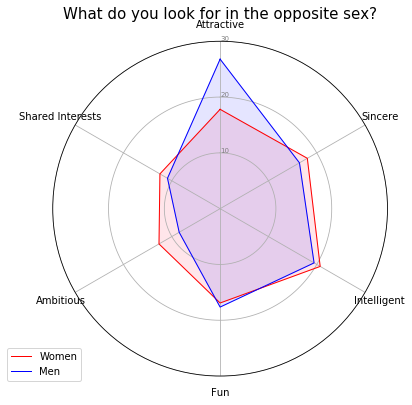

In [41]:
# Plotting the data using Radar Charts for Men and Women

categories=list(sd_gender_q1)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
fig = plt.figure(figsize=(6,7))
ax = plt.subplot(111, polar=True)
ax.set_title("What do you look for in the opposite sex?",fontsize=15)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,30)
values=sd_gender_q1.loc[0].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="red", label="Women")
ax.fill(angles, values, 'b', alpha=0.4, color="pink")
values=sd_gender_q1.loc[1].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="blue", label="Men")
ax.fill(angles, values, 'r', alpha=0.1, color="blue")
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

We can see from the graph above that men and women are looking for different things in a date.

+ Attractiveness ranks highest for men and they are less concerned with ambition and shared interests. 
+ Women are looking for a well-rounded male and intelligence rates highest.

## 6.2. What you think your fellow men/women look for in the opposite sex?

In [45]:
sd_gender_q2
# gender: 0(female)
# gender: 1(male)

,gender,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
0,0,20.972542,10.459545,11.782425,13.347519,10.804671,10.128040
1,1,24.208806,10.008977,10.997336,14.653698,7.271372,10.088948


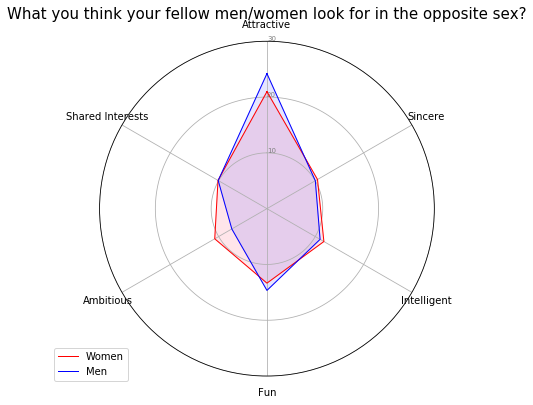

In [42]:
categories=list(sd_gender_q2)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
fig = plt.figure(figsize=(6,7))
ax = plt.subplot(111, polar=True)
ax.set_title("What you think your fellow men/women look for in the opposite sex?",fontsize=15)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,30)
values=sd_gender_q2.loc[0].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="red", label="Women")
ax.fill(angles, values, 'b', alpha=0.4, color="pink")
values=sd_gender_q2.loc[1].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="blue", label="Men")
ax.fill(angles, values, 'r', alpha=0.1, color="blue")
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In the graph above, we see how participants view their peers. Both men and women think their peers value attractiveness the most.

+ Men think their peers value attractiveness and are less concerned with a woman’s ambition.

+ Although women themselves are looking at a well rounded mate and value intelligence, they think fellow women are looking for attractive and ambitious men. Women view themselves differently from their counterparts.

## 6.3. What do you think the opposite sex looks for in a date?

In [46]:
sd_gender_q3
# gender: 0(female)
# gender: 1(male)

,gender,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
0,0,35.191011,11.183685,12.355304,18.469343,9.100473,12.466800
1,1,24.972971,15.108684,16.202000,18.028991,14.132992,10.992725


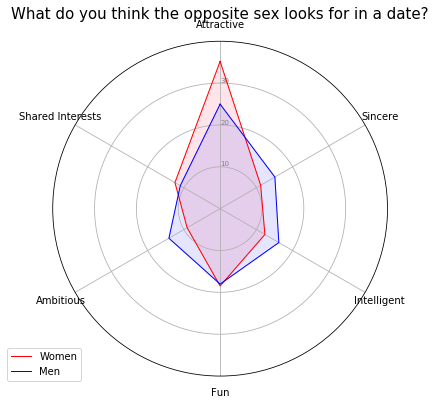

In [10]:
categories=list(sd_gender_q3)[1:]
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
fig = plt.figure(figsize=(6,7))
ax = plt.subplot(111, polar=True)
ax.set_title("What do you think the opposite sex looks for in a date?",fontsize=15)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
values=sd_gender_q3.loc[0].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="red", label="Women")
ax.fill(angles, values, 'b', alpha=0.4, color="pink")
values=sd_gender_q3.loc[1].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="blue", label="Men")
ax.fill(angles, values, 'r', alpha=0.1, color="blue")
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In the graph above and from the previous graphs, we see that men and women both can somewhat predict what the opposite sex is looking for in a date.

+ Women correctly feel that men are most concerned with a woman’s attractiveness.
+ Men to a certain extent correctly predict what women are looking for. The main difference from graph 4.1 is a higher attractiveness score.


## 6.4. How Order Influences Decision Making

We will analyze if the order you met the opposite sex will have an influence on whether or not you would like to go on a second date with them.

The speed-dating dataset contains data in 'waves' contain varying numbers of participants. To adjust for this inconsistency, we divide the order of the date by the total number of dates in the wave.

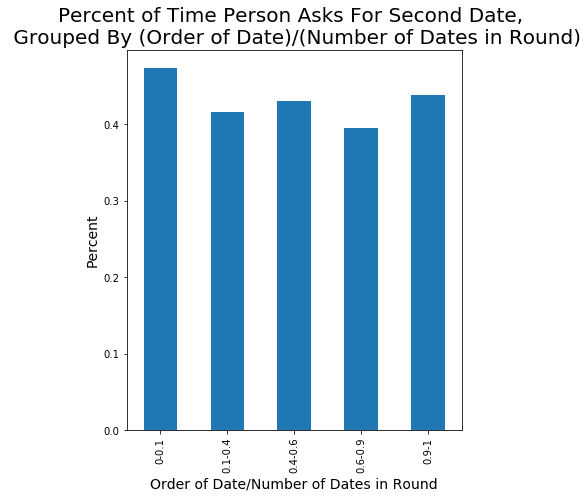

In [49]:
speed["order_round"] = speed["order"]/speed["round"]
bins = [0, 0.1, 0.4, 0.6, 0.9, 1]
group_names = ['0-0.1', '0.1-0.4', '0.4-0.6', '0.6-0.9', '0.9-1']
speed['categories'] = pd.cut(speed['order_round'], bins, labels=group_names)
orderAvg = speed.groupby(['categories'])['dec'].mean()
fig,ax = plt.subplots(figsize=(6,7))
orderAvg.plot(ax=ax, kind='bar')
ax.set_title('Percent of Time Person Asks For Second Date, \n Grouped By (Order of Date)/(Number of Dates in Round)', fontsize=20)
ax.set_xlabel('Order of Date/Number of Dates in Round', fontsize=14)
ax.set_ylabel('Percent', fontsize=14)

Dates that occur towards the beginning of the night and the end are more likely to lead to second dates. Dates start fresh for the first few rounds are enthusiastic and this wanes off in the middle rounds. Interest increases towards the last round of dates for the night. This could indicate people being desperate to get matches towards the end.

## 6.5. Participants Stated Interest Compared to Actual Influence on Decision

We have so far looked at what people 'say' they are looking for in a date. We will now see if their actual decision matches their stated interest in the beginning. Participants were asked to grade their partners on a scale of 1-10 on attractivess, sincerity, intelligence, fun, ambition and shared interests. We analyse the correlation score of the decision made with respect to the score of different attributes of the partner.

In [12]:
sd['pgender'] = np.where(sd['gender']==0, 1, 0)

sd_pid_gender = sd.groupby(['pid','pgender'])
sd_pid_gender = sd_pid_gender['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar'].mean()
sd_pid_gender = sd_pid_gender.reset_index()
sd_pid_gender.columns = ['pid', 'pgender', 'Decision', 'Attractive', 'Sincere', 'Intelligent', 'Fun', 
                         'Ambitious', 'Shared Interests']

sd_pid_gender_attr = sd_pid_gender[sd_pid_gender['Attractive'] != 0]
sd_pid_gender_sinc = sd_pid_gender[sd_pid_gender['Sincere'] != 0]
sd_pid_gender_intel = sd_pid_gender[sd_pid_gender['Intelligent'] != 0]
sd_pid_gender_fun = sd_pid_gender[sd_pid_gender['Fun'] != 0]
sd_pid_gender_amb = sd_pid_gender[sd_pid_gender['Ambitious'] != 0]
sd_pid_gender_shar = sd_pid_gender[sd_pid_gender['Shared Interests'] != 0]

sd_pid_gender_attractive = round((sd_pid_gender_attr['Decision'].corr(sd_pid_gender_attr['Attractive'])),2)
sd_pid_gender_sincere = round((sd_pid_gender_sinc['Decision'].corr(sd_pid_gender_sinc['Sincere'])),2)
sd_pid_gender_intelligent = round((sd_pid_gender_intel['Decision'].corr(sd_pid_gender_intel['Intelligent'])),2)
sd_pid_gender_fun = round((sd_pid_gender_fun['Decision'].corr(sd_pid_gender_fun['Fun'])),2)
sd_pid_gender_ambitious = round((sd_pid_gender_amb['Decision'].corr(sd_pid_gender_amb['Ambitious'])),2)
sd_pid_gender_shared_interests = round((sd_pid_gender_shar['Decision'].corr(sd_pid_gender_shar['Shared Interests'])),2)


sd_pid_gender_female_attr = sd_pid_gender[((sd_pid_gender['pgender'] == 0) & (sd_pid_gender['Attractive'] != 0))]
sd_pid_gender_female_sinc = sd_pid_gender[((sd_pid_gender['pgender'] == 0) & (sd_pid_gender['Sincere'] != 0))]
sd_pid_gender_female_intel = sd_pid_gender[((sd_pid_gender['pgender'] == 0) & (sd_pid_gender['Intelligent'] != 0))]
sd_pid_gender_female_fun = sd_pid_gender[((sd_pid_gender['pgender'] == 0) & (sd_pid_gender['Fun'] != 0))]
sd_pid_gender_female_amb = sd_pid_gender[((sd_pid_gender['pgender'] == 0) & (sd_pid_gender['Ambitious'] != 0))]
sd_pid_gender_female_shar = sd_pid_gender[((sd_pid_gender['pgender'] == 0) & (sd_pid_gender['Shared Interests'] != 0))]


sd_pid_gender_male_attr = sd_pid_gender[((sd_pid_gender['pgender'] == 1) & (sd_pid_gender['Attractive'] != 0))]
sd_pid_gender_male_sinc = sd_pid_gender[((sd_pid_gender['pgender'] == 1) & (sd_pid_gender['Sincere'] != 0))]
sd_pid_gender_male_intel = sd_pid_gender[((sd_pid_gender['pgender'] == 1) & (sd_pid_gender['Intelligent'] != 0))]
sd_pid_gender_male_fun = sd_pid_gender[((sd_pid_gender['pgender'] == 1) & (sd_pid_gender['Fun'] != 0))]
sd_pid_gender_male_amb = sd_pid_gender[((sd_pid_gender['pgender'] == 1) & (sd_pid_gender['Ambitious'] != 0))]
sd_pid_gender_male_shar = sd_pid_gender[((sd_pid_gender['pgender'] == 1) & (sd_pid_gender['Shared Interests'] != 0))]


sd_pid_gender_attractive_female = round((sd_pid_gender_female_attr['Decision'].corr(sd_pid_gender_female_attr['Attractive'])),2)
sd_pid_gender_attractive_male = round((sd_pid_gender_male_attr['Decision'].corr(sd_pid_gender_male_attr['Attractive'])),2)

sd_pid_gender_sincere_female = round((sd_pid_gender_female_sinc['Decision'].corr(sd_pid_gender_female_sinc['Sincere'])),2)
sd_pid_gender_sincere_male = round((sd_pid_gender_male_sinc['Decision'].corr(sd_pid_gender_male_sinc['Sincere'])),2)

sd_pid_gender_intelligent_female = round((sd_pid_gender_female_intel['Decision'].corr(sd_pid_gender_female_intel['Intelligent'])),2)
sd_pid_gender_intelligent_male = round((sd_pid_gender_male_intel['Decision'].corr(sd_pid_gender_male_intel['Intelligent'])),2)

sd_pid_gender_fun_female = round((sd_pid_gender_female_fun['Decision'].corr(sd_pid_gender_female_fun['Fun'])),2)
sd_pid_gender_fun_male = round((sd_pid_gender_male_fun['Decision'].corr(sd_pid_gender_male_fun['Fun'])),2)

sd_pid_gender_ambitious_female = round((sd_pid_gender_female_amb['Decision'].corr(sd_pid_gender_female_amb['Ambitious'])),2)
sd_pid_gender_ambitious_male = round((sd_pid_gender_male_amb['Decision'].corr(sd_pid_gender_male_amb['Ambitious'])),2)

sd_pid_gender_shared_interests_female = round((sd_pid_gender_female_shar['Decision'].corr(sd_pid_gender_female_shar['Shared Interests'])),2)
sd_pid_gender_shared_interests_male = round((sd_pid_gender_male_shar['Decision'].corr(sd_pid_gender_male_shar['Shared Interests'])),2)

sd_pid_gender_df = pd.DataFrame({"gender": ['Average','Female','Male'],
                                 "Attractive": [sd_pid_gender_attractive, sd_pid_gender_attractive_female, sd_pid_gender_attractive_male],
                                 "Sincere":[sd_pid_gender_sincere, sd_pid_gender_sincere_female, sd_pid_gender_sincere_male],
                                 "Intelligent":[sd_pid_gender_intelligent, sd_pid_gender_intelligent_female, sd_pid_gender_intelligent_male],
                                 "Fun":[sd_pid_gender_fun, sd_pid_gender_fun_female, sd_pid_gender_fun_male ],
                                 "Ambitious":[sd_pid_gender_ambitious, sd_pid_gender_ambitious_female, sd_pid_gender_ambitious_male],
                                 "Shared Interests":[sd_pid_gender_shared_interests, sd_pid_gender_shared_interests_female, sd_pid_gender_shared_interests_male]})
sd_pid_gender_df = pd.DataFrame(sd_pid_gender_df, columns=['gender', 'Attractive', 'Sincere','Intelligent', 'Fun','Ambitious','Shared Interests'])
sd_pid_gender_df

,gender,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
0,Average,0.79,0.25,0.27,0.66,0.29,0.61
1,Female,0.80,0.20,0.34,0.63,0.46,0.56
2,Male,0.77,0.28,0.29,0.68,0.27,0.67


In [19]:
sd_pid_gender_df_male = sd_pid_gender_df[(sd_pid_gender_df['gender'] == 'Male')]
sum_male= sd_pid_gender_df_male['Attractive'] + sd_pid_gender_df_male['Sincere'] + sd_pid_gender_df_male['Intelligent'] + sd_pid_gender_df_male['Fun'] + sd_pid_gender_df_male['Ambitious'] + sd_pid_gender_df_male['Shared Interests']
sd_pid_gender_df_male.loc[:,"Attractive"] = (sd_pid_gender_df_male["Attractive"] /(sum_male)) * 100
sd_pid_gender_df_male.loc[:,"Sincere"]= (sd_pid_gender_df_male["Sincere"] /(sum_male)) * 100
sd_pid_gender_df_male.loc[:,"Intelligent"]= (sd_pid_gender_df_male["Intelligent"] /(sum_male)) * 100
sd_pid_gender_df_male.loc[:,"Fun"]= (sd_pid_gender_df_male["Fun"] /(sum_male)) * 100
sd_pid_gender_df_male.loc[:,"Ambitious"]= (sd_pid_gender_df_male["Ambitious"] /(sum_male)) * 100
sd_pid_gender_df_male.loc[:,"Shared Interests"]= (sd_pid_gender_df_male["Shared Interests"] /(sum_male)) * 100

sd_pid_gender_df_male

,gender,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
2,Male,26.013514,9.459459,9.797297,22.972973,9.121622,22.635135


In [20]:
sd_pid_gender_df_female = sd_pid_gender_df[(sd_pid_gender_df['gender'] == 'Female')]
sum_female= sd_pid_gender_df_female['Attractive'] + sd_pid_gender_df_female['Sincere'] + sd_pid_gender_df_female['Intelligent'] + sd_pid_gender_df_female['Fun'] + sd_pid_gender_df_female['Ambitious'] + sd_pid_gender_df_female['Shared Interests']
sd_pid_gender_df_female.loc[:,"Attractive"] = (sd_pid_gender_df_female["Attractive"] /(sum_female)) * 100
sd_pid_gender_df_female.loc[:,"Sincere"]= (sd_pid_gender_df_female["Sincere"] /(sum_female)) * 100
sd_pid_gender_df_female.loc[:,"Intelligent"]= (sd_pid_gender_df_female["Intelligent"] /(sum_female)) * 100
sd_pid_gender_df_female.loc[:,"Fun"]= (sd_pid_gender_df_female["Fun"] /(sum_female)) * 100
sd_pid_gender_df_female.loc[:,"Ambitious"]= (sd_pid_gender_df_female["Ambitious"] /(sum_female)) * 100
sd_pid_gender_df_female.loc[:,"Shared Interests"]= (sd_pid_gender_df_female["Shared Interests"] /(sum_female)) * 100

sd_pid_gender_df_female

,gender,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
1,Female,26.755853,6.688963,11.371237,21.070234,15.384615,18.729097


In [21]:
sd_gender_q1_male = sd_gender_q1[(sd_gender_q1['gender'] == 1)]
sd_gender_q1_male

,gender,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
1,1,26.793307,16.419759,19.444206,17.636826,8.471257,10.891695


In [22]:
sd_gender_q1_female = sd_gender_q1[(sd_gender_q1['gender'] == 0)]
sd_gender_q1_female

,gender,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
0,0,17.800621,18.046883,20.706338,16.905492,12.646341,12.458248


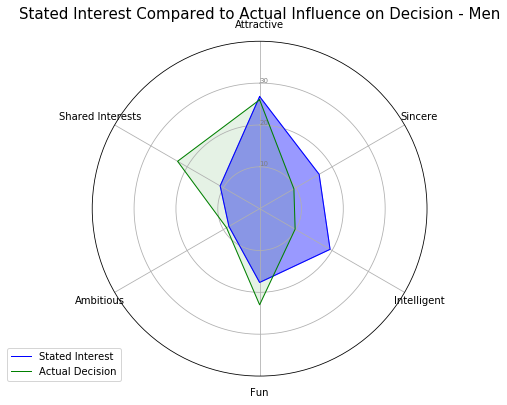

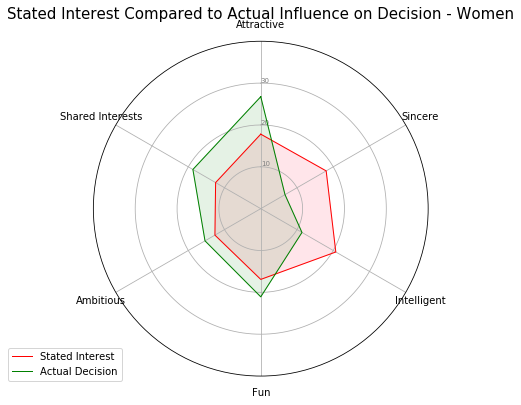

In [31]:
categories=list(sd_gender_q1_male)[1:]
N = len(categories)
categories
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
fig = plt.figure(figsize=(6,7))
ax = plt.subplot(111, polar=True)
ax.set_title("Stated Interest Compared to Actual Influence on Decision - Men",fontsize=15)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)


values=sd_gender_q1_male.loc[1].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="blue", label="Stated Interest")
ax.fill(angles, values, 'b', alpha=0.4, color="blue")


values=sd_pid_gender_df_male.loc[2].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="green", label="Actual Decision")
ax.fill(angles, values, 'r', alpha=0.1, color="green")
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


categories=list(sd_gender_q1_female)[1:]
N = len(categories)
categories
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
fig = plt.figure(figsize=(6,7))
ax = plt.subplot(111, polar=True)
ax.set_title("Stated Interest Compared to Actual Influence on Decision - Women",fontsize=15)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)


values=sd_gender_q1_female.loc[0].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="red", label="Stated Interest")
ax.fill(angles, values, 'b', alpha=0.4, color="pink")


values=sd_pid_gender_df_female.loc[1].drop('gender').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="green", label="Actual Decision")
ax.fill(angles, values, 'r', alpha=0.1, color="green")
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


As we see from the graphs above, there is a drastic difference between what participants 'say' they want and what they actually went with. 
+ Males accurately matched the the attractiveness score. They overestimated intelligence and underestimated shared interests and fun.

+ Females stated interest and actual influence of these attributes are all way off, underestimating attractiveness, shared interest, and fun, while overestimating sincerity, intelligenence and ambition

# 7. Conclusion

From our Predictive Analysis we found that Attractivness is the most important attribute for both men and women and our descriptive analysis points to the same conclusion.

The actual decision to go on second dates proves that attractiveness is the most important attribute. The visualization indicates that both male and female are not quite good at figuring out what they actually want, as there exist a huge gap between their state evaluation and what actually influences their decision.